#### Pair Problem - Week2 - Day5 - Regression Practice

Practice Lasso regularization technique in five steps:

1) Load Diabetes Dataset from SK Learn (`sklearn.datasets.load_diabetes()`).  Note that data may already be normalized.

2) Use the KFold function from sklearn's cross validation module to divide the data into 5 training/test sets.  Randomize the KFold (via the shuffle parameter with Random State of 0).

3) Tune the lambda (alpha) parameter in the lasso model by looping over a grid of possible lambdas (sklearn: lasso)

```
For each candidate lambda, loop over the 5 training/test sets.  
On each training/test set run the lasso model on the training set and then compute and record the prediction error in the test set.  
Finally total the prediction error for the 5 training/test sets.
```

4) Set lambda to be the value that minimizes prediction error.

5) Run the lasso model again with the optimal lambda determined in step 3. Which variables would you consider excluding on the basis of these results?

6) Try with Ridge and ElasticNet and base LinearRegression Models.  Compare your results.

Report the best score.

**Extra Credit**:  Try some Feature Engineering (Polynomials etc) to fit the data better.  Plot the data to see relationships.

In [15]:
from __future__ import division, print_function  # Python 2 and 3 Compatibility

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [17]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression

from sklearn.cross_validation import cross_val_score, train_test_split, KFold
from sklearn.grid_search import GridSearchCV

### Load Data

In [18]:
diabetes = load_diabetes()

In [19]:
diabetes.keys()

dict_keys(['data', 'target'])

* data Matrix is X and target vecor is y

In [20]:
len(diabetes.data)

442

### Build an Hold OUT Set to test different Models

In [21]:
X_train, X_holdout, y_train, y_holdout = train_test_split(diabetes.data, diabetes.target, 
                                                          test_size=0.1, random_state=42)

### Split Training Data into Multiple Folds

In [22]:
# Notice that we are splitting the X_train data into 5 Folds

kfold = KFold(len(X_train), n_folds=5, shuffle=True, random_state=0)

### Baseline: Linear Regression

In [23]:
lin_reg_est = LinearRegression()

scores = cross_val_score(lin_reg_est, X_train, y_train, cv=kfold)
print(scores)
print("Linear Reg Mean Score: ", np.mean(scores))

# Build the Model
lin_reg_est.fit(X_train, y_train)

[ 0.38015962  0.41985738  0.55536535  0.48203479  0.52900323]
Linear Reg Mean Score:  0.473284075438


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Evaluating Model

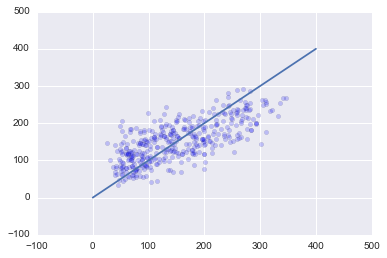

In [24]:
# Fitted vs. Actual
y_train_pred = lin_reg_est.predict(X_train)

plt.scatter(y_train, y_train_pred, alpha=0.2)
plt.plot([0, 400], [0, 400])

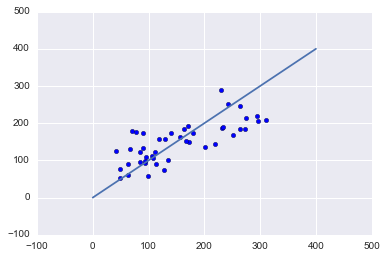

In [25]:
# Fitted vs. Actual
y_test_pred = lin_reg_est.predict(X_holdout)

plt.scatter(y_holdout, y_test_pred)
plt.plot([0, 400], [0, 400])

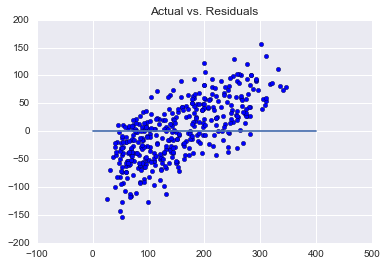

In [26]:
# Plot Residuals

lin_reg_residuals = y_train - y_train_pred

plt.scatter(y_train, lin_reg_residuals)
plt.plot([0,400], [0, 0])
plt.title("Actual vs. Residuals")

### Lasso

Lasso Model:


[mean: 0.47293, std: 0.06545, params: {'alpha': 0.0001},
 mean: 0.47295, std: 0.06543, params: {'alpha': 0.00016042171611153241},
 mean: 0.47297, std: 0.06540, params: {'alpha': 0.00025735127000169099},
 mean: 0.47301, std: 0.06535, params: {'alpha': 0.00041284732377153599},
 mean: 0.47307, std: 0.06526, params: {'alpha': 0.00066229676171483253},
 mean: 0.47315, std: 0.06512, params: {'alpha': 0.001062467830894041},
 mean: 0.47325, std: 0.06490, params: {'alpha': 0.0017044291274531946},
 mean: 0.47336, std: 0.06455, params: {'alpha': 0.0027342744561652328},
 mean: 0.47346, std: 0.06409, params: {'alpha': 0.0043863700057795363},
 mean: 0.47327, std: 0.06341, params: {'alpha': 0.0070366900382730557},
 mean: 0.47228, std: 0.06241, params: {'alpha': 0.011288378916846895},
 mean: 0.47213, std: 0.06036, params: {'alpha': 0.018109011179578204},
 mean: 0.47213, std: 0.05688, params: {'alpha': 0.029050786505108613},
 mean: 0.47203, std: 0.05188, params: {'alpha': 0.04660377025539271},
 mean: 0.

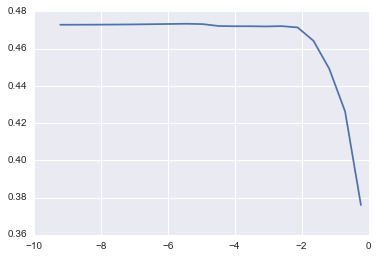

In [27]:
print("Lasso Model:")
params = {
    "alpha": np.logspace(-4, -.1, 20)
}

grid_est = GridSearchCV(Lasso(), param_grid=params, cv=kfold)
grid_est.fit(X_train, y_train)
df = pd.DataFrame(grid_est.grid_scores_)
df["alpha"] = df.parameters.apply(lambda val: val["alpha"])
plt.plot(np.log(df.alpha), df.mean_validation_score);
grid_est.grid_scores_

### Ridge

Ridge Model:


[mean: 0.47296, std: 0.06544, params: {'alpha': 0.0001},
 mean: 0.47298, std: 0.06542, params: {'alpha': 0.00016042171611153241},
 mean: 0.47302, std: 0.06537, params: {'alpha': 0.00025735127000169099},
 mean: 0.47307, std: 0.06531, params: {'alpha': 0.00041284732377153599},
 mean: 0.47314, std: 0.06521, params: {'alpha': 0.00066229676171483253},
 mean: 0.47324, std: 0.06505, params: {'alpha': 0.001062467830894041},
 mean: 0.47334, std: 0.06483, params: {'alpha': 0.0017044291274531946},
 mean: 0.47342, std: 0.06453, params: {'alpha': 0.0027342744561652328},
 mean: 0.47345, std: 0.06411, params: {'alpha': 0.0043863700057795363},
 mean: 0.47343, std: 0.06354, params: {'alpha': 0.0070366900382730557},
 mean: 0.47339, std: 0.06278, params: {'alpha': 0.011288378916846895},
 mean: 0.47343, std: 0.06172, params: {'alpha': 0.018109011179578204},
 mean: 0.47358, std: 0.06024, params: {'alpha': 0.029050786505108613},
 mean: 0.47379, std: 0.05815, params: {'alpha': 0.04660377025539271},
 mean: 0.

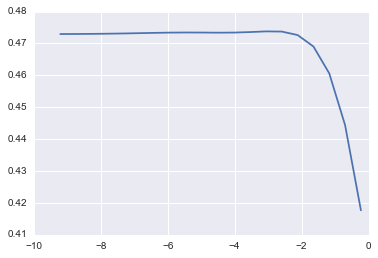

In [28]:
print("Ridge Model:")
params = {
    "alpha": np.logspace(-4, -.1, 20)
}

grid_est = GridSearchCV(Ridge(), param_grid=params, cv=kfold)
grid_est.fit(X_train, y_train)
df = pd.DataFrame(grid_est.grid_scores_)
df["alpha"] = df.parameters.apply(lambda val: val["alpha"])
plt.plot(np.log(df.alpha), df.mean_validation_score);
grid_est.grid_scores_

### Make Functions for repeatable Code - DRY

In [29]:
def build_grid_search_est(model, X, y, cv=5, **params):
    
    grid_est = GridSearchCV(model, param_grid=params, cv=cv)
    grid_est.fit(X, y)
    df = pd.DataFrame(grid_est.grid_scores_)
    for param in params:
        df[param] = df.parameters.apply(lambda val: val[param])
#         plt.plot(np.log(df.alpha), df.mean_validation_score);
        plt.semilogx(df.alpha, df.mean_validation_score)
    grid_est.grid_scores_
    return grid_est

Lasso Grid Search


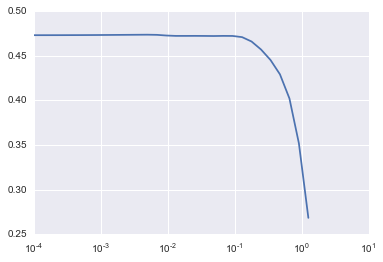

In [30]:
print("Lasso Grid Search")
lasso_grid_est = build_grid_search_est(Lasso(), X_train, y_train, cv=kfold,
                                       alpha=np.logspace(-4, 0.1, 30))

Ridge Grid Search


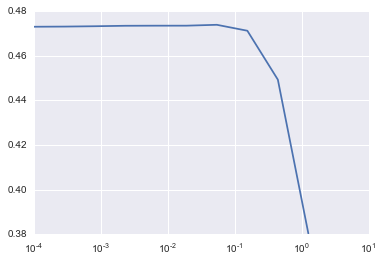

In [31]:
print("Ridge Grid Search")
ridge_grid_est = build_grid_search_est(Ridge(), X_train, y_train, cv=kfold,
                                       alpha=np.logspace(-4, 0.1, 10))

Elastic Net Grid Search


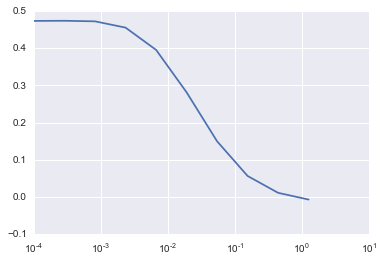

In [32]:
print("Elastic Net Grid Search")
elastic_net_grid_est = build_grid_search_est(ElasticNet(), X_train, y_train, cv=kfold,
                                             alpha=np.logspace(-4, 0.1, 10))

In [33]:
print("Lasso Grid Scores")
lasso_grid_est.grid_scores_

Lasso Grid Scores


[mean: 0.47293, std: 0.06545, params: {'alpha': 0.0001},
 mean: 0.47294, std: 0.06544, params: {'alpha': 0.00013847753058820778},
 mean: 0.47295, std: 0.06542, params: {'alpha': 0.00019176026477808002},
 mean: 0.47297, std: 0.06540, params: {'alpha': 0.00026554487931409402},
 mean: 0.47300, std: 0.06536, params: {'alpha': 0.00036771999147759357},
 mean: 0.47304, std: 0.06531, params: {'alpha': 0.00050920956367733977},
 mean: 0.47308, std: 0.06524, params: {'alpha': 0.0007051408292993675},
 mean: 0.47313, std: 0.06515, params: {'alpha': 0.00097646160758297273},
 mean: 0.47320, std: 0.06502, params: {'alpha': 0.0013521799213228151},
 mean: 0.47327, std: 0.06484, params: {'alpha': 0.0018724653641574052},
 mean: 0.47335, std: 0.06459, params: {'alpha': 0.0025929437974046669},
 mean: 0.47342, std: 0.06429, params: {'alpha': 0.0035906445401860804},
 mean: 0.47349, std: 0.06394, params: {'alpha': 0.0049722358914499921},
 mean: 0.47331, std: 0.06343, params: {'alpha': 0.006885429477500502},
 m

In [34]:
print("Ridge Grid Scores")
ridge_grid_est.grid_scores_

Ridge Grid Scores


[mean: 0.47296, std: 0.06544, params: {'alpha': 0.0001},
 mean: 0.47303, std: 0.06536, params: {'alpha': 0.00028546676634979331},
 mean: 0.47318, std: 0.06515, params: {'alpha': 0.00081491274690207404},
 mean: 0.47339, std: 0.06464, params: {'alpha': 0.0023263050671536237},
 mean: 0.47343, std: 0.06362, params: {'alpha': 0.0066408278506348379},
 mean: 0.47344, std: 0.06160, params: {'alpha': 0.018957356524063752},
 mean: 0.47383, std: 0.05734, params: {'alpha': 0.054116952654646319},
 mean: 0.47116, std: 0.04891, params: {'alpha': 0.15448591479026733},
 mean: 0.44925, std: 0.03510, params: {'alpha': 0.44100594541767318},
 mean: 0.38032, std: 0.01922, params: {'alpha': 1.2589254117941673}]

In [35]:
print("Elatic Net Grid Scores")
elastic_net_grid_est.grid_scores_

Elatic Net Grid Scores


[mean: 0.47340, std: 0.06204, params: {'alpha': 0.0001},
 mean: 0.47377, std: 0.05826, params: {'alpha': 0.00028546676634979331},
 mean: 0.47225, std: 0.05063, params: {'alpha': 0.00081491274690207404},
 mean: 0.45536, std: 0.03756, params: {'alpha': 0.0023263050671536237},
 mean: 0.39556, std: 0.02139, params: {'alpha': 0.0066408278506348379},
 mean: 0.28144, std: 0.01135, params: {'alpha': 0.018957356524063752},
 mean: 0.14974, std: 0.01137, params: {'alpha': 0.054116952654646319},
 mean: 0.05658, std: 0.01255, params: {'alpha': 0.15448591479026733},
 mean: 0.01127, std: 0.01336, params: {'alpha': 0.44100594541767318},
 mean: -0.00682, std: 0.01374, params: {'alpha': 1.2589254117941673}]

### Evaluating Models using Holdout Set across these four models

In [36]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = lin_reg_est.predict(X_holdout)
print("Linear Regression:", r2_score(y_holdout, y_pred))

y_pred = lasso_grid_est.predict(X_holdout)
print("Lasso Regression:", r2_score(y_holdout, y_pred))

y_pred = ridge_grid_est.predict(X_holdout)
print("Ridge Regression:", r2_score(y_holdout, y_pred))

y_pred = elastic_net_grid_est.predict(X_holdout)
print("ElasticNet Regression:", r2_score(y_holdout, y_pred))

Linear Regression: 0.551425191499
Lasso Regression: 0.553760859161
Ridge Regression: 0.551665253276
ElasticNet Regression: 0.551594377724


In [37]:
pd.DataFrame(list(zip(range(10), lasso_grid_est.best_estimator_.coef_)))

,0,1
0,0,18.066967
1,1,-257.366113
2,2,512.224987
3,3,332.956702
4,4,-578.071781
5,5,269.562539
6,6,-0.000000
7,7,195.616953
8,8,618.500529
9,9,70.196591


### EDA

In [38]:
diabetes_df = pd.DataFrame(diabetes.data)
diabetes_df.columns = ["X" + str(col) for col in diabetes_df.columns]
diabetes_df["target"] = diabetes.target

In [39]:
diabetes_df.corr()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,target
X0,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
X1,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
X2,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
X3,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
X4,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
X5,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
X6,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
X7,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
X8,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
X9,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


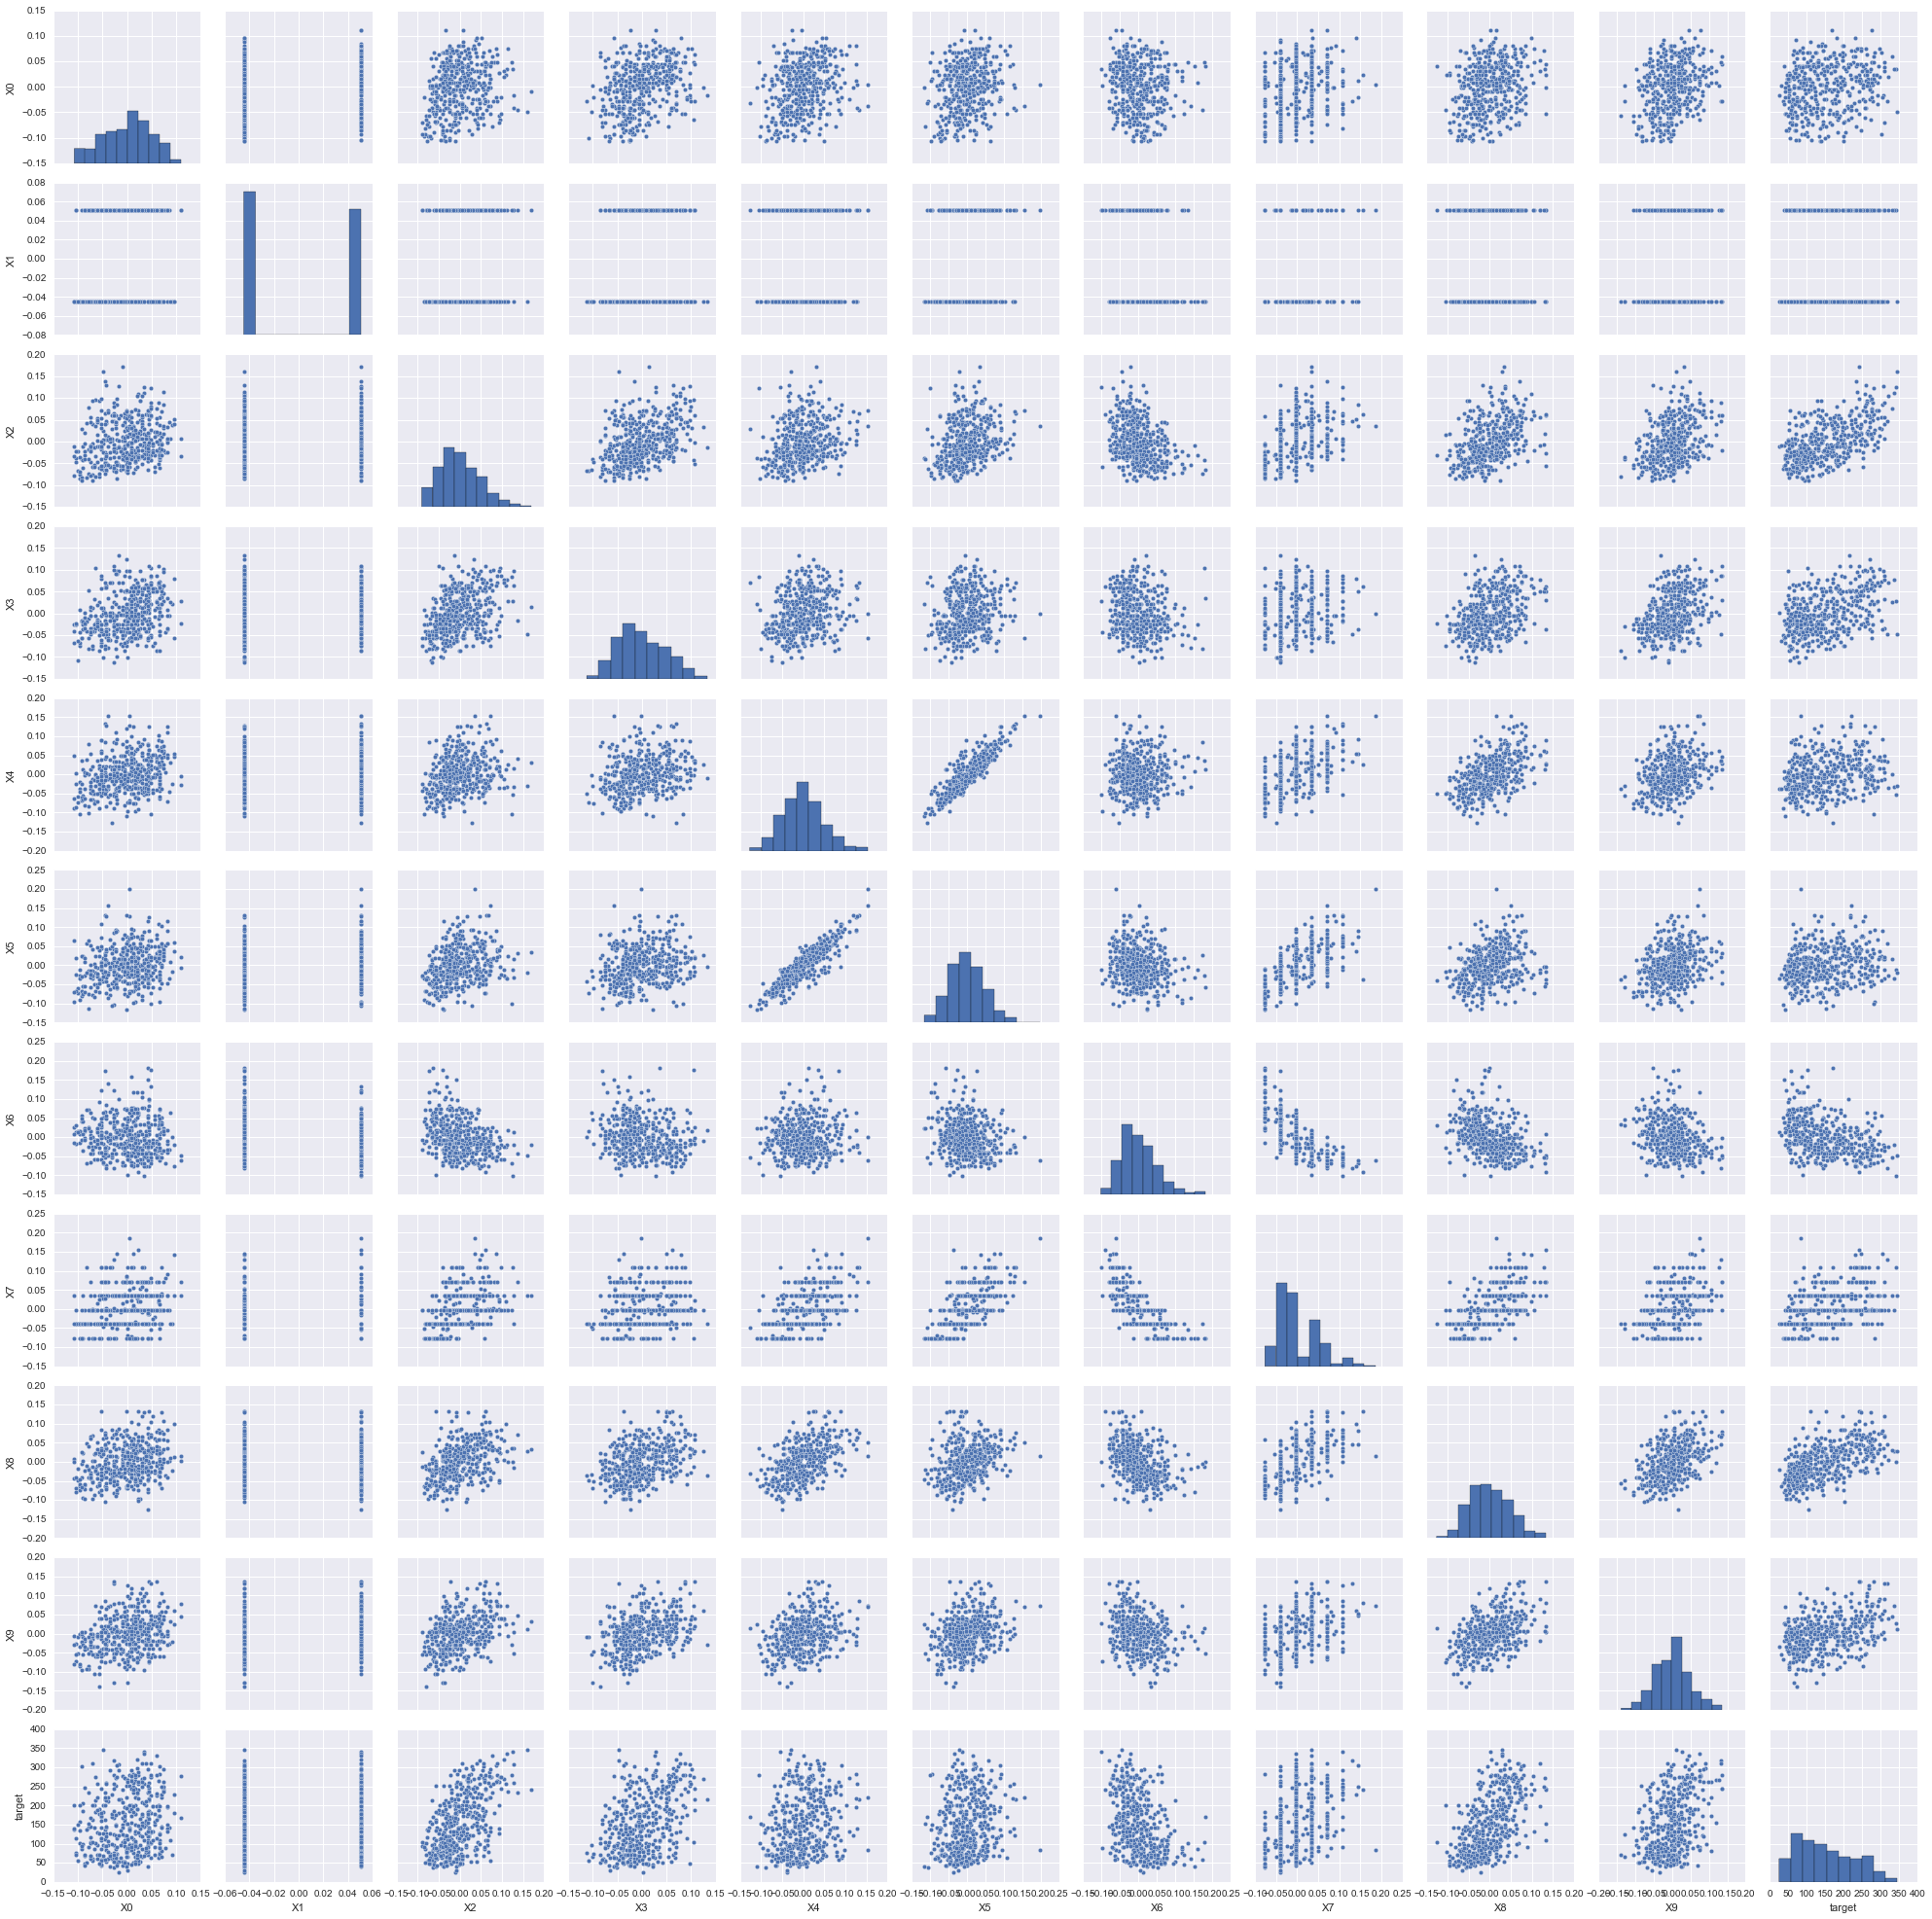

In [40]:
sns.pairplot(diabetes_df)